# <h1><center>Explanable Machine Learning for Heart Failure Prediction</center></h1>

## Introduction
Cardiovascular diseases (CVDs) are the number 1 cause of death globally, taking an estimated 17.9 million lives each year, which accounts for 31% of all deaths worldwide. Four out of 5CVD deaths are due to heart attacks and strokes, and one-third of these deaths occur prematurely in people under 70 years of age. Heart failure is a common event caused by CVDs and this dataset contains 11 features that can be used to predict a possible heart disease.
People with cardiovascular disease or who are at high cardiovascular risk (due to the presence of one or more risk factors such as hypertension, diabetes, hyperlipidaemia or already established disease) need early detection and management wherein a machine learning model can be of great help.

## Objectives
The main objective of this work is to predict if a patient is at risk of having heart disease or not, based on the common features of patients with heart disease. To that end, four different methods, including **random forest**, **naïve bayes**, **kernel SVM**, and **XGBoost** are exploited and their performance is compared to find the best model for the prediction of heart disease.
Finally,  the obtained results are interpreted with **SHAP values** to see the effect of each feature on the prediction. It can help clinicians to better understand the reasons behind the prediction.


## Description of the dataset
This dataset was created by combining different datasets already available independently but not combined before. In this dataset, 5 heart datasets with a total of **918 observations** are combined over **11 common features** which makes it the largest heart disease dataset available so far for research purposes. The features are as the following:

1. *Age*: age of the patient [years]
2. *Sex*: sex of the patient [M: Male, F: Female]
3. *ChestPainType*: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]
4. *RestingBP*: resting blood pressure [mm Hg]
5. *Cholesterol*: serum cholesterol [mm/dl]
6. *FastingBS*: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]
7. *RestingECG*: resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]
8. *MaxHR*: maximum heart rate achieved [Numeric value between 60 and 202]
9. *ExerciseAngina*: exercise-induced angina [Y: Yes, N: No]
10. *Oldpeak*: oldpeak = ST [Numeric value measured in depression]
11. *ST_Slope*: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]
- *HeartDisease*: output class [1: heart disease, 0: Normal]

source: https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/; https://www.kaggle.com/fedesoriano/heart-failure-prediction

# Code

## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Importing the dataset

In [2]:
dataset = pd.read_csv('heart.csv')
dataset.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [3]:
dataset.shape

(918, 12)

## Taking care of missing or duplicate data

In [4]:
dataset.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [5]:
dataset[dataset.duplicated()]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease


There is no missing or duplicate data

## Encoding  the label variables
'Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', and 'ST_Slope' should be converted from string to numeric values.

In [6]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
lables = ['Sex','ChestPainType','RestingECG','ExerciseAngina','ST_Slope']
for i in lables:
    dataset[i] = LabelEncoder().fit_transform(dataset[i])
dataset[i] = le.fit_transform(dataset[i])

## Spliting the features (X) and the output (y)

In [7]:
X = dataset.drop(columns=['HeartDisease'])
y = dataset['HeartDisease']

In [8]:
X.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,40,1,1,140,289,0,1,172,0,0.0,2
1,49,0,2,160,180,0,1,156,0,1.0,1
2,37,1,1,130,283,0,2,98,0,0.0,2
3,48,0,0,138,214,0,1,108,1,1.5,1
4,54,1,2,150,195,0,1,122,0,0.0,2


## Visualizing the data
We plot the histogram of the continuous features to understand the data distribution and detect the outliers if there is any.

In [9]:
continuous_features = [i for i in X.columns if X[i].nunique() > 10]
print(f'continuous feature: {continuous_features}')

continuous feature: ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']


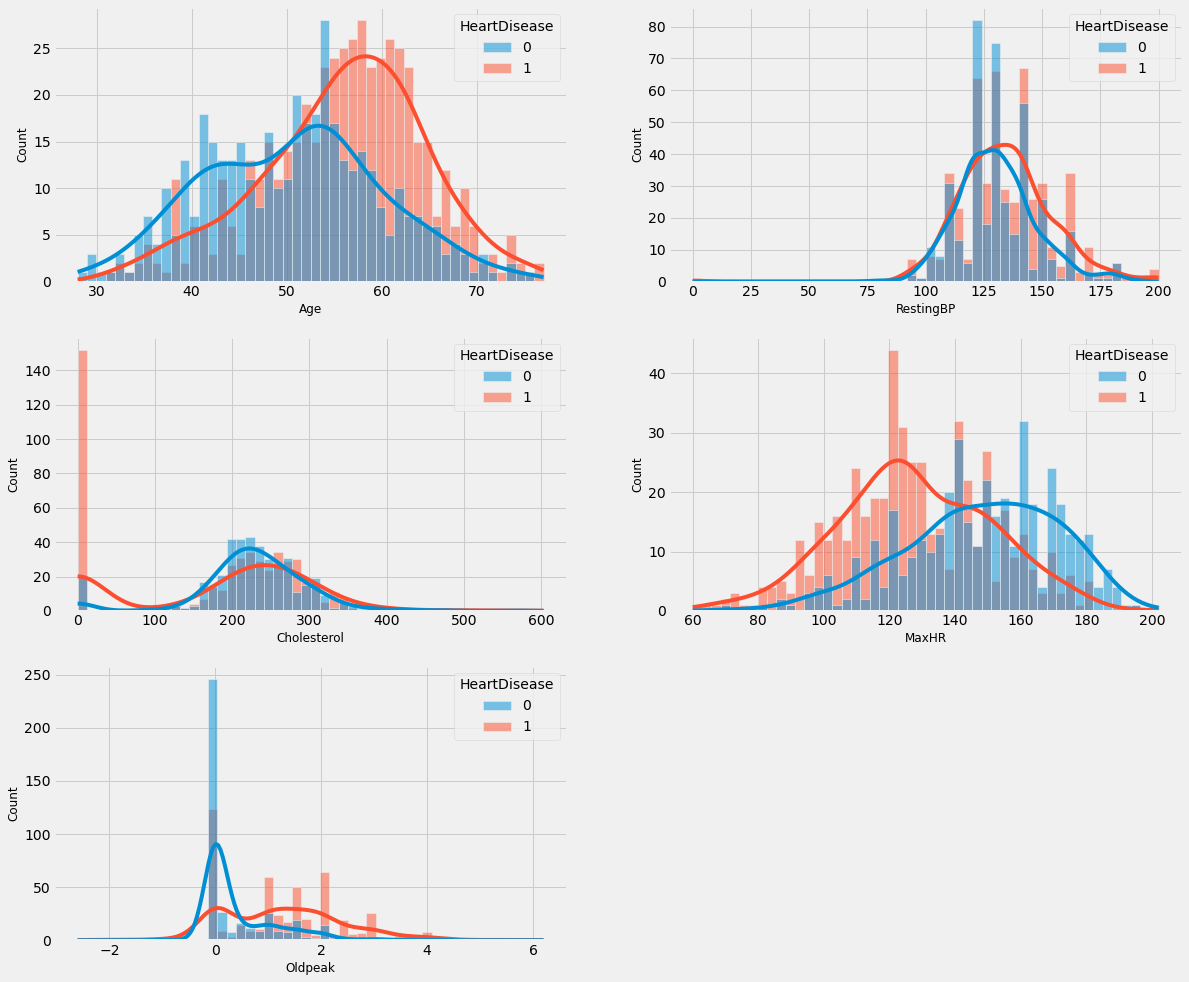

In [10]:
plt.style.use('fivethirtyeight')
i = 1
plt.figure(figsize=(18,16)) 
for feature in continuous_features:
    plt.subplot(round(len(continuous_features)/2)+1, 2, i)
    sns.histplot(x=X[feature], kde=True, bins=50, hue=y)
    plt.xlabel(feature,size=12)
    plt.ylabel("Count",size=12)
    i += 1
    
plt.show()

It seems there is missing data for Cholestreol; it cannot be zero. So, we remove the data with Cholestreol = 0.

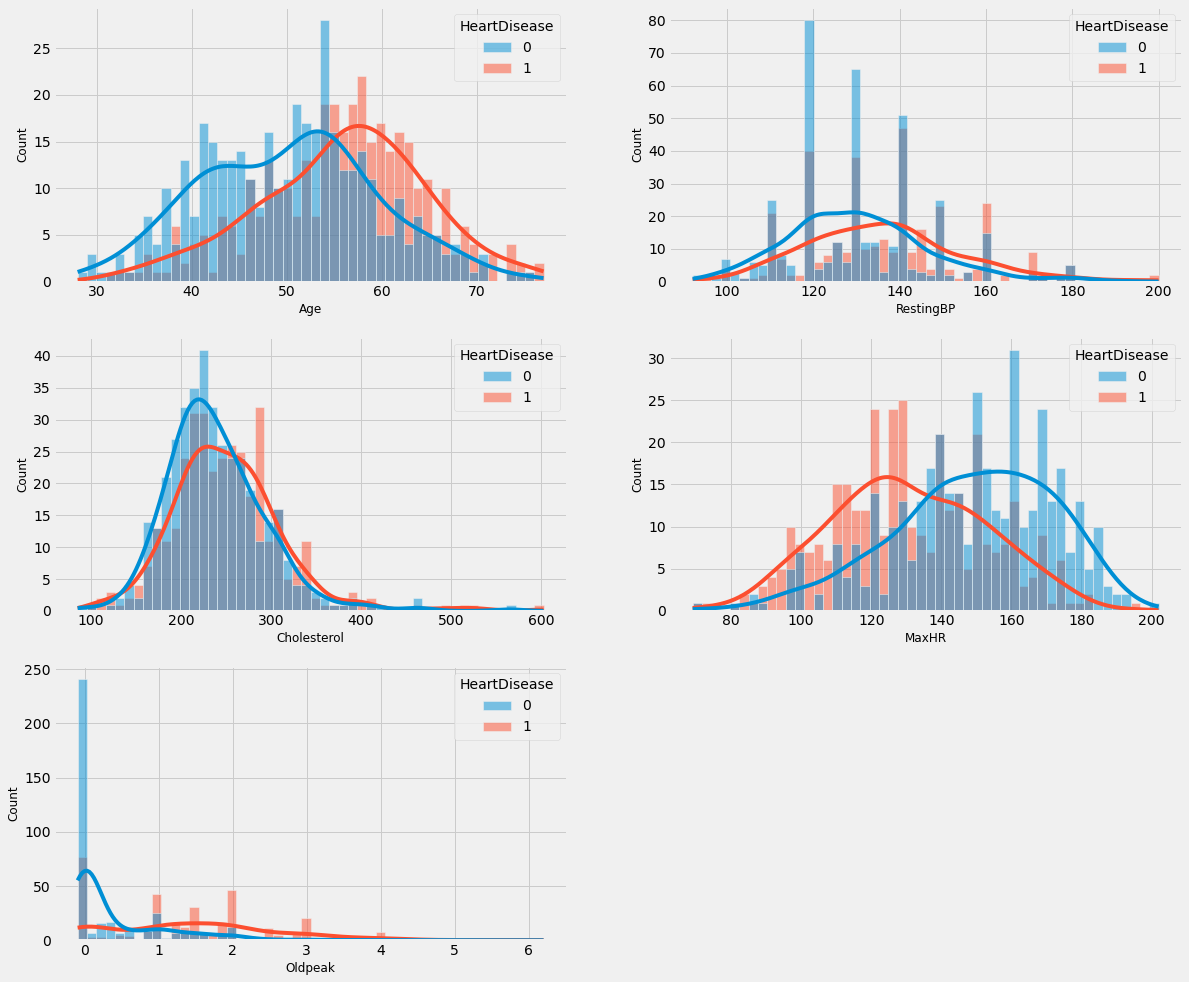

In [11]:
mask = X['Cholesterol'] > 0
X, y = X[mask], y[mask]
## plot the data again
i = 1
plt.figure(figsize=(18,16)) 
for feature in continuous_features:
    plt.subplot(round(len(continuous_features)/2)+1, 2, i)
    sns.histplot(x=X[feature], kde=True, bins=50, hue=y)
    plt.xlabel(feature,size=12)
    plt.ylabel("Count",size=12)
    i += 1
    
plt.show()

## Spliting the dataset into Training set and Test set

In [12]:
from sklearn.model_selection import train_test_split
X_train_, X_test_, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

## Feature Scaling
*Apply it only on continuous features*

In [13]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = X_train_.copy()
X_train.loc[:, continuous_features] = sc.fit_transform(X_train_.loc[:, continuous_features])
X_test = X_test_.copy()
X_test.loc[:, continuous_features] = sc.transform(X_test_.loc[:, continuous_features])
X_train.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
97,-1.488742,1,2,1.559413,-1.657558,1,1,0.827799,0,-0.839637,2
784,1.263530,1,3,0.297173,0.632989,1,0,1.401244,0,0.466222,1
720,-0.536032,1,0,-0.506071,0.497253,0,0,1.073561,0,-0.373259,1
683,-0.959459,0,2,-0.850318,-0.045691,0,1,0.377234,0,-0.559810,1
493,-0.218462,1,2,0.239799,1.600110,0,1,-0.523894,1,0.746049,1


In [14]:
X_test.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
859,-0.218462,0,2,0.411922,1.074132,0,0,0.090511,0,0.559497,2
686,0.416677,0,0,-0.735569,1.854615,0,1,0.950680,1,-0.279983,2
14,-1.171172,0,2,-1.022441,-0.571669,0,2,-0.114291,0,-0.839637,2
31,0.310821,1,2,-0.161823,-1.318218,0,1,-1.056380,0,-0.839637,2
157,-0.430176,1,0,0.411922,-1.012812,0,1,-0.401013,0,-0.839637,2


## Polynomial Feature Transform

In [15]:
# perform a polynomial features transform of the train and test sets
#trans = PolynomialFeatures(degree=3)
#X_train = trans.fit_transform(X_train)
#X_test = trans.fit_transform(X_test)
# summarize
#print(X_train.shape, X_test.shape)

Polynomial Feature Transform didn't improvethe reuslts. However, it can be tested with different degrees and different models to see if it can improve the prediction or not.

## Build and compare differnt models

Here four differnet classifiers (Random Forest, Naive Bayes, Kernel SVM, and XGBOOST) are trained and compared.<br>
* Since we are dealing with health data and having false negatives is not acceptable, the best score to look at is the **recall** score of class 1 (in this case, Heart Disease).

### 1. Random Forest Classification 

#### 1.1. Train the model on the Training set

In [16]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

#### 1.2. Predict the Test set results

In [17]:
y_pred = classifier.predict(X_test)

#### 1.3. Make the Classificatoin Report and Confusion Matrix

In [18]:
from sklearn.metrics import classification_report, roc_curve, confusion_matrix, accuracy_score, recall_score, auc
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.90      0.87        78
           1       0.88      0.82      0.85        72

    accuracy                           0.86       150
   macro avg       0.86      0.86      0.86       150
weighted avg       0.86      0.86      0.86       150



In [19]:
cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Random Forest Classifier has an accuracy score of {:.2f} and recall score of class  {:.2f}'.format((accuracy_score(y_test, y_pred) *100),(recall_score(y_test, y_pred) *100)))

[[70  8]
 [13 59]]
Random Forest Classifier has an accuracy score of 86.00 and recall score of class  81.94


## 2. Naive Bayes

### 2.1. Train the model on the Training set

In [20]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

### 2.2. Predict the Test set results

In [21]:
y_pred = classifier.predict(X_test)

### 2.3. Make the Classificatoin Report and Confusion Matrix

In [22]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.91      0.89        78
           1       0.90      0.85      0.87        72

    accuracy                           0.88       150
   macro avg       0.88      0.88      0.88       150
weighted avg       0.88      0.88      0.88       150



In [23]:
cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Naive Bayes Classifier has an accuracy score of {:.2f} and recall score of {:.2f}'.format((accuracy_score(y_test, y_pred) *100),(recall_score(y_test, y_pred) *100)))

[[71  7]
 [11 61]]
Naive Bayes Classifier has an accuracy score of 88.00 and recall score of 84.72


## 3. Kernel SVM 

### 3.1.Train the model on the Training set

In [24]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(X_train, y_train)

SVC(random_state=0)

### 3.2. Predict the Test set results

In [25]:
y_pred = classifier.predict(X_test)

### 3.3. Make the Classificatoin Report and Confusion Matrix

In [26]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.87      0.88        78
           1       0.86      0.89      0.88        72

    accuracy                           0.88       150
   macro avg       0.88      0.88      0.88       150
weighted avg       0.88      0.88      0.88       150



In [27]:
cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Kernel SVM Classifier has an accuracy score of {:.2f} and recall score of {:.2f}'.format((accuracy_score(y_test, y_pred) *100),(recall_score(y_test, y_pred) *100)))

[[68 10]
 [ 8 64]]
Kernel SVM Classifier has an accuracy score of 88.00 and recall score of 88.89


### 4. XGBoost

#### 4.1. Train the model on the Training set

In [28]:
import xgboost as xgb
classifier = xgb.XGBClassifier(use_label_encoder=False)
classifier.fit(X_train, y_train, eval_metric="aucpr")

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=16, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', use_label_encoder=False,
              validate_parameters=1, verbosity=None)

#### 4.2. Predict the Test set results

In [29]:
y_pred = classifier.predict(X_test)

#### 4.3. Make the Classificatoin Report and Confusion Matrix

In [30]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.91      0.87      0.89        78
           1       0.87      0.90      0.88        72

    accuracy                           0.89       150
   macro avg       0.89      0.89      0.89       150
weighted avg       0.89      0.89      0.89       150



In [31]:
cm = confusion_matrix(y_test, y_pred)
print(cm)
print('XGBoost Classifier has an accuracy score of {:.2f} and recall score of {:.2f}'.format((accuracy_score(y_test, y_pred) *100),(recall_score(y_test, y_pred) *100)))

[[68 10]
 [ 7 65]]
XGBoost Classifier has an accuracy score of 88.67 and recall score of 90.28


Based on the accuracy score, XGBoost is slightly better than other models. To improve it's performance we tune its hyperparameters.

## Hyperparameter tuning

In [32]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, StratifiedKFold

In [33]:
# A parameter grid for XGBoost
params = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]
        }

In [42]:
# Apply iterative randomized search to find the best parameter values combination
skf = StratifiedKFold(n_splits=5, shuffle = True, random_state = 1001)

classifier_tuned = RandomizedSearchCV(classifier, param_distributions=params, n_iter=5, 
                                   scoring='recall', n_jobs=4, cv=skf.split(X_train,y_train), 
                                   verbose=3, random_state=1001,return_train_score=False)
classifier_tuned.fit(X_train, y_train,eval_metric="aucpr")
print(classifier_tuned.best_params_)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
{'subsample': 0.6, 'min_child_weight': 1, 'max_depth': 5, 'gamma': 1.5, 'colsample_bytree': 0.8}


In [43]:
# Generate the new model with the tuned parameters
classifier = xgb.XGBClassifier(**classifier_tuned.best_params_,use_label_encoder=False)
classifier.fit(X_train, y_train, eval_metric="aucpr")

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8, gamma=1.5, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=16, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.6,
              tree_method='exact', use_label_encoder=False,
              validate_parameters=1, verbosity=None)

In [44]:
y_pred = classifier.predict(X_test)

In [45]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.87      0.92      0.89        74
           1       0.92      0.87      0.89        76

    accuracy                           0.89       150
   macro avg       0.89      0.89      0.89       150
weighted avg       0.89      0.89      0.89       150



In [46]:
cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Tuned XGBoost Classifier has an accuracy score of {:.2f} and recall score of {:.2f}'.format((accuracy_score(y_test, y_pred) *100),(recall_score(y_test, y_pred) *100)))

[[68 10]
 [ 6 66]]
Tuned XGBoost Classifier has an accuracy score of 89.33 and recall score of 91.67


Hyperparmeter tuning slightly  enhamce the accuracy score. Let's plot the ROC curve fot it:

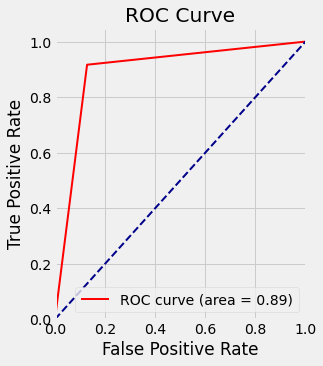

In [47]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(4,5))
lw = 2
plt.plot(fpr, tpr, color='red', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='darkblue', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

## Interpret the results with SHAP Values
To get an overview of which features are most important for the model we can plot the SHAP values of every feature:

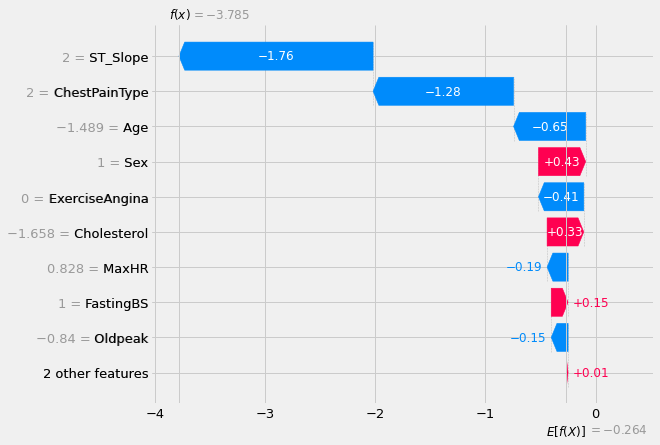

In [48]:
import shap
explainer = shap.Explainer(classifier, X_train)
shap_values = explainer(X_train, check_additivity=False )
shap.plots.waterfall(shap_values[0])

The above explanation shows features each contributing to push the model output from the base value (the average model output over the training dataset we passed) to the model output. 
Features pushing the prediction to class 1 (Heart Disease) are shown in red, those pushing the prediction to class 0 (No Heart Disease) are in blue.

We can also plot the SHAP values of every feature for every test sample.

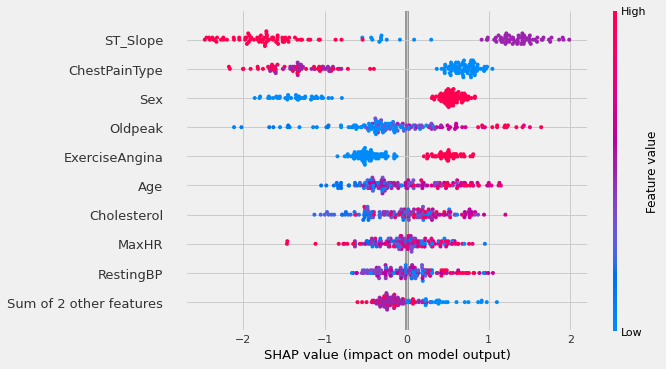

In [49]:
explainer = shap.Explainer(classifier, X_test)
shap_values = explainer(X_test, check_additivity=False )
shap.plots.beeswarm(shap_values)

The plot above sorts features by the sum of SHAP value magnitudes over all samples, and uses SHAP values to show the distribution of the impacts each feature has on the model output. The color represents the feature value (red high, blue low). 

# Conclusion
Comparing the performance of the four different techniques, XGBoost outperformed the others by the accuracy and recall scores of 88.7 and 90.3, respectively. Tuning the hyperparameters of XGBoost could increase the accuracy and recall scores of prediction to 89.3 and 91.7, respectively.
The SHAP values were calculated globally and locally to explain the impact of each feature on the model, as well as the symptoms of each patient that led to their associated diagnosis. From the SHAP value plots, we can conclude that:
* **ST_Slope** has the highest contribution to the prediction. 
* High ST_Slope values (**upsloping**) pushes the prediction to class 0 (**Normal**), while the **flat slope** of the peak exercise ST segment pushes the model output to **heart disease**. 
* Patients with **ASYM ChestPainType**, which is encoded to 0 (blue colour in the graph) are _more likely_ to have **heart disease**.
* **Males** (encoded to 1) are _more likely_ to have **heart disease** than females.* 
* People who have **high oldpeak**, are more prone to heart disease.
* Higher the **exercise angina**, the higher the chance of having heart disease
* **Older patients** are more at risk of having heart disease